<a href="https://colab.research.google.com/github/cjstntjd/machine/blob/master/%EC%A0%84%EA%B5%AD%EC%A3%BC%ED%83%9D%EB%B6%84%EC%96%91%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive',force_remount = True)

Mounted at /gdrive


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns

In [0]:
df = pd.read_csv('/gdrive/My Drive/자료들/apartment_price.csv',encoding='euc-kr')

In [0]:
df.head()

,area,part,year,month,price
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 5 columns):
area     4250 non-null object
part     4250 non-null object
year     4250 non-null int64
month    4250 non-null int64
price    3982 non-null object
dtypes: int64(2), object(3)
memory usage: 166.1+ KB


In [0]:
df=df.dropna(how='any')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 4249
Data columns (total 5 columns):
area     3982 non-null object
part     3982 non-null object
year     3982 non-null int64
month    3982 non-null int64
price    3982 non-null object
dtypes: int64(2), object(3)
memory usage: 186.7+ KB


In [0]:
df['price'].value_counts()

2221    17
        16
3226    15
2776    14
2657    14
        ..
2593     1
3949     1
2420     1
4931     1
2006     1
Name: price, Length: 1733, dtype: int64

In [0]:
#object 변수 찾아서 카운트 해놓기
object_var = [col for col in df.columns if df[col].dtype == 'object']
print('number of object',object_var)

number of object ['area', 'part', 'price']


In [0]:
from sklearn.preprocessing import LabelEncoder

for col in object_var:
  le=LabelEncoder()
  df[col] = le.fit_transform(df[col])

df.head()

,area,part,year,month,price
0,8,4,2015,10,1527
1,8,1,2015,10,1523
2,8,2,2015,10,1531
3,8,3,2015,10,1526
4,8,0,2015,10,1530


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 4249
Data columns (total 5 columns):
area     3982 non-null int64
part     3982 non-null int64
year     3982 non-null int64
month    3982 non-null int64
price    3982 non-null int64
dtypes: int64(5)
memory usage: 186.7 KB


In [0]:
log_cols = ['price','year']

for col in log_cols:
  df[col] = np.log1p(df[col])

In [0]:
from sklearn import preprocessing

x=df.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled  = min_max_scaler.fit_transform(x)

df= pd.DataFrame(x_scaled,columns=df.columns)

df

,area,part,year,month,price
0,0.500,1.00,0.0,0.818182,0.983119
1,0.500,0.25,0.0,0.818182,0.982767
2,0.500,0.50,0.0,0.818182,0.983469
3,0.500,0.75,0.0,0.818182,0.983031
4,0.500,0.00,0.0,0.818182,0.983382
...,...,...,...,...,...
3977,0.125,0.75,1.0,0.909091,0.921353
3978,0.125,0.00,1.0,0.909091,0.971004
3979,0.875,1.00,1.0,0.909091,0.958530
3980,0.875,0.50,1.0,0.909091,0.958846


<Figure size 1080x216 with 0 Axes>

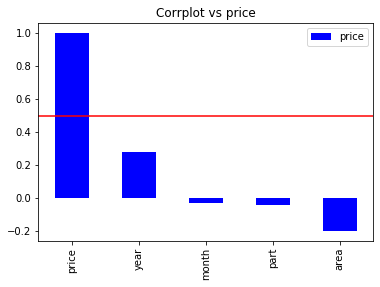

In [0]:
corr = df.corr()

plt.subplots(1,0,figsize = (15,3))
corr['price'].sort_values(ascending = False).to_frame().plot.bar(color = 'blue')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.title('Corrplot vs price')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train,test = train_test_split(df,test_size=0.3)

train_y = train['price']
train_x = train.drop(['price'],axis=1)
test_y = test['price']
test_x = test.drop(['price'],axis=1)

lr = LinearRegression()
lr.fit(train_x, train_y)

pred = lr.predict(test_x)

mse = np.mean((pred - test_y)**2)

print(mse)

0.015159348734492867
